### HDR: Aggregate attributes by year

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

from pprint import pprint

%matplotlib inline

#### Set input/output folders

In [2]:
data_in  = '../data/HDR_1b_iso_standardization'
data_out = '../data/HDR_1c_aggregate_attr_by_year'

if not os.path.exists(data_out):
    os.mkdir(data_out)

#### Read data

In [3]:
all_attrs = dict()

for dim in os.listdir(data_in):
    dim_path = f'{data_in}/{dim}'
    
    if os.path.isdir(dim_path):
        for attr_file in os.listdir(dim_path):
            if not os.path.isdir(attr_file):
                attr = f'[{dim}] {attr_file[:-4]}'
                all_attrs[attr] = pd.read_csv(f'{dim_path}/{attr_file}',
                                              index_col='Country')
    else:
        attr = dim[:-4]
        all_attrs[attr] = pd.read_csv(f'{dim_path}',
                                      index_col='Country')

In [4]:
attrs = sorted(list(all_attrs.keys()))
print(len(attrs))

141


#### Concatenate attributes by year | [Dimension] Attribute

In [5]:
df_dict = dict()

for attr in attrs:
    df = all_attrs[attr]
    for year in df.columns:
        if year not in df_dict.keys():
            df_dict[year] = pd.DataFrame()
        df_year = pd.DataFrame(df[year])
        df_year.columns = [attr]
        df_dict[year] = df_dict[year].join(df_year, how='outer')
        # df_dict[year][attr] = df[year]

#### Year (Number of countries, Number of attributes)

In [6]:
yoi = list()  # years of interest

print('YEAR CNT ATR')
for year in df_dict.keys():
    
    if len(year) > 4:
        print(f'\n{year}')
        pprint(df_dict[year].columns)
        
    else:
        print(year, df_dict[year].count().max(), df_dict[year].shape[1])
        yoi.append(year)

YEAR CNT ATR
1990 195 71
1991 191 18
1992 191 8
1993 191 8
1994 191 8
1995 195 90
1996 191 9
1997 191 9
1998 191 8
1999 191 8
2000 195 103
2001 191 8
2002 191 8
2003 191 8
2004 191 8
2005 195 105
2006 191 8
2007 191 8
2008 191 8
2009 191 8
2010 195 115
2011 195 108
2012 195 107
2013 195 107
2014 195 108
2015 195 116
2016 195 102
2017 195 83

2008-2013
Index(['[Education] Proportion of schools with access to the Internet (%)'], dtype='object')

1990/2015
Index(['[Environmental Sustainability] Forest area, change (%)'], dtype='object')

2003-2017
Index(['[Gender] Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)'], dtype='object')

2007-2017
Index(['[Gender] Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)'], dtype='object')

2005-2018
Index(['[Gender] Violence against women ever experienced, intimate partner (% of female population ages 15 and older)', '[Gender] Violence a

In [7]:
yoi.sort()
pprint(yoi)

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']


#### Plot (Year, Number of countries/attributes / density)

In [8]:
year_countries = pd.Series([df_dict[year].count().max()
                            for year in yoi])
year_countries.index = yoi

year_attributes = pd.Series([df_dict[year].shape[1]
                             for year in yoi])
year_attributes.index = yoi

year_density = pd.Series([((100 * df_dict[year].count().sum()) /
                          (df_dict[year].shape[0] * df_dict[year].shape[1]))
                          for year in yoi])
year_density.index = yoi

In [9]:
year_density

1990    72.654388
1991    85.567010
1992    87.113402
1993    87.693299
1994    87.822165
1995    75.977208
1996    81.481481
1997    87.521368
1998    88.853093
1999    89.561856
2000    80.109534
2001    94.458763
2002    94.845361
2003    95.231959
2004    95.811856
2005    80.732601
2006    97.229381
2007    97.164948
2008    97.358247
2009    97.422680
2010    81.489409
2011    80.916429
2012    80.958543
2013    80.857896
2014    80.982906
2015    78.625111
2016    77.315234
2017    74.204510
dtype: float64

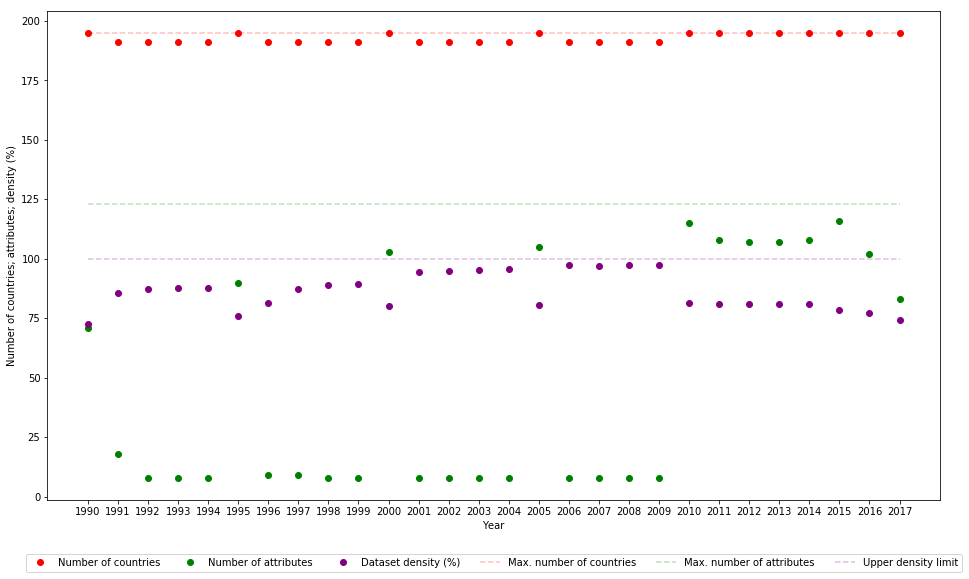

In [10]:
opacity = 0.25

plt.figure(figsize=(16,9))

plt.plot(year_countries, marker='o', linestyle='', color='red')
plt.plot(year_attributes, marker='o', linestyle='', color='green')
plt.plot(year_density, marker='o', linestyle='', color='purple')

# plt.title('Number of countries/attributes, and density (%) per year')
plt.xlabel('Year')
plt.ylabel('Number of countries; attributes; density (%)')

plt.hlines(195, 0, len(yoi)-1, colors='red',
           linestyles='dashed', alpha=opacity)
plt.hlines(123, 0, len(yoi)-1, colors='green',
           linestyles='dashed', alpha=opacity)
plt.hlines(100, 0, len(yoi)-1, colors='purple',
           linestyles='dashed', alpha=opacity)

plt.legend(['Number of countries', 'Number of attributes', 'Dataset density (%)',
            'Max. number of countries', 'Max. number of attributes', 'Upper density limit'],
           loc=9, bbox_to_anchor=(0.5, -0.1), ncol=6)

plt.savefig('../plots/HDR_number_of_countries_attributes_density_per_year.png')
plt.show()

#### Output data to csv format

In [11]:
for year in yoi:
    df_dict[year].to_csv(f'{data_out}/{year}.csv',
                         index_label='Country')

In [12]:
year_density.to_csv('../data/HDR_year_density.csv', header=None)